In [55]:
import numpy as np
import pandas as pd
from functions import *

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline

# Classification Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import plot_confusion_matrix, classification_report

# Scalers
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer

# Categorical Create Dummies
from sklearn.preprocessing import OneHotEncoder

In [88]:
#notes for later:
#drop NA values across the board
#investigate object types
#investigate kepid vs kepoi_name

#disposition uses lightcurve data to finalize candidates into confirmed status
#remove other metrics already used to classify dispositions

In [44]:
drop_columns = ['kepid','kepoi_name','kepler_name','koi_pdisposition','koi_sage','koi_longp','koi_ingress','koi_disp_prov','koi_limbdark_mod','koi_trans_mod','koi_sparprov','koi_tce_delivname']

In [14]:
target = 'koi_disposition' #ternerary classification

In [2]:
df = pd.read_csv(r'Data\KeplerData.csv',skiprows=76)

In [3]:
df.head()

,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,...,koi_fwm_srao,koi_fwm_sdeco,koi_fwm_prao,koi_fwm_pdeco,koi_dicco_mra,koi_dicco_mdec,koi_dicco_msky,koi_dikco_mra,koi_dikco_mdec,koi_dikco_msky
0,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,...,0.430,0.940,-0.00020,-0.00055,-0.010,0.200,0.200,0.080,0.310,0.320
1,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,0,...,-0.630,1.230,0.00066,-0.00105,0.390,0.000,0.390,0.490,0.120,0.500
2,10811496,K00753.01,NaN,CANDIDATE,CANDIDATE,0.000,0,0,0,0,...,-0.021,-0.038,0.00070,0.00060,-0.025,-0.034,0.042,0.002,-0.027,0.027
3,10848459,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,...,-0.111,0.002,0.00302,-0.00142,-0.249,0.147,0.289,-0.257,0.099,0.276
4,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,...,-0.010,0.230,0.00008,-0.00007,0.030,-0.090,0.100,0.070,0.020,0.070


In [4]:
df.columns

Index(['kepid', 'kepoi_name', 'kepler_name', 'koi_disposition',
       'koi_pdisposition', 'koi_score', 'koi_fpflag_nt', 'koi_fpflag_ss',
       'koi_fpflag_co', 'koi_fpflag_ec', 'koi_disp_prov', 'koi_period',
       'koi_time0bk', 'koi_time0', 'koi_eccen', 'koi_longp', 'koi_impact',
       'koi_duration', 'koi_ingress', 'koi_depth', 'koi_ror', 'koi_srho',
       'koi_fittype', 'koi_prad', 'koi_sma', 'koi_incl', 'koi_teq',
       'koi_insol', 'koi_dor', 'koi_limbdark_mod', 'koi_max_sngle_ev',
       'koi_max_mult_ev', 'koi_model_snr', 'koi_count', 'koi_num_transits',
       'koi_tce_plnt_num', 'koi_tce_delivname', 'koi_quarters',
       'koi_bin_oedp_sig', 'koi_trans_mod', 'koi_steff', 'koi_slogg',
       'koi_smet', 'koi_srad', 'koi_smass', 'koi_sage', 'koi_sparprov', 'ra',
       'dec', 'koi_kepmag', 'koi_gmag', 'koi_rmag', 'koi_imag', 'koi_zmag',
       'koi_jmag', 'koi_hmag', 'koi_kmag', 'koi_fwm_stat_sig', 'koi_fwm_sra',
       'koi_fwm_sdec', 'koi_fwm_srao', 'koi_fwm_sdeco', 'koi

In [5]:
for col in df.columns:
    print(df[col].isna().value_counts())

False    9564
Name: kepid, dtype: int64
False    9564
Name: kepoi_name, dtype: int64
True     7199
False    2365
Name: kepler_name, dtype: int64
False    9564
Name: koi_disposition, dtype: int64
False    9564
Name: koi_pdisposition, dtype: int64
False    8054
True     1510
Name: koi_score, dtype: int64
False    9564
Name: koi_fpflag_nt, dtype: int64
False    9564
Name: koi_fpflag_ss, dtype: int64
False    9564
Name: koi_fpflag_co, dtype: int64
False    9564
Name: koi_fpflag_ec, dtype: int64
False    9564
Name: koi_disp_prov, dtype: int64
False    9564
Name: koi_period, dtype: int64
False    9564
Name: koi_time0bk, dtype: int64
False    9564
Name: koi_time0, dtype: int64
False    9201
True      363
Name: koi_eccen, dtype: int64
True    9564
Name: koi_longp, dtype: int64
False    9201
True      363
Name: koi_impact, dtype: int64
False    9564
Name: koi_duration, dtype: int64
True    9564
Name: koi_ingress, dtype: int64
False    9201
True      363
Name: koi_depth, dtype: int64
False    92

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9564 entries, 0 to 9563
Data columns (total 70 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   kepid              9564 non-null   int64  
 1   kepoi_name         9564 non-null   object 
 2   kepler_name        2365 non-null   object 
 3   koi_disposition    9564 non-null   object 
 4   koi_pdisposition   9564 non-null   object 
 5   koi_score          8054 non-null   float64
 6   koi_fpflag_nt      9564 non-null   int64  
 7   koi_fpflag_ss      9564 non-null   int64  
 8   koi_fpflag_co      9564 non-null   int64  
 9   koi_fpflag_ec      9564 non-null   int64  
 10  koi_disp_prov      9564 non-null   object 
 11  koi_period         9564 non-null   float64
 12  koi_time0bk        9564 non-null   float64
 13  koi_time0          9564 non-null   float64
 14  koi_eccen          9201 non-null   float64
 15  koi_longp          0 non-null      float64
 16  koi_impact         9201 

In [7]:
df.koi_disposition.value_counts()

FALSE POSITIVE    4840
CONFIRMED         2363
CANDIDATE         2361
Name: koi_disposition, dtype: int64

In [8]:
df.describe()

,kepid,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_time0bk,koi_time0,koi_eccen,...,koi_fwm_srao,koi_fwm_sdeco,koi_fwm_prao,koi_fwm_pdeco,koi_dicco_mra,koi_dicco_mdec,koi_dicco_msky,koi_dikco_mra,koi_dikco_mdec,koi_dikco_msky
count,9.564000e+03,8054.000000,9564.000000,9564.000000,9564.000000,9564.000000,9564.000000,9564.000000,9.564000e+03,9201.0,...,9109.000000,9109.000000,8734.000000,8747.000000,8965.000000,8965.000000,8965.000000,8994.000000,8994.000000,8994.000000
mean,7.690628e+06,0.480829,0.208595,0.232748,0.197512,0.120033,75.671358,166.183251,2.454999e+06,0.0,...,-0.316136,-0.165817,-0.000097,-0.000714,-0.012281,-0.045420,1.866561,-0.024244,-0.076749,1.812566
std,2.653459e+06,0.476928,4.767290,0.422605,0.398142,0.325018,1334.744046,67.918960,6.791896e+01,0.0,...,20.254777,20.534655,0.058224,0.092986,2.406550,2.573558,2.988742,2.382286,2.553758,2.986376
min,7.574500e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.241843,120.515914,2.454954e+06,0.0,...,-742.430000,-417.900000,-4.000000,-6.000000,-25.100000,-75.900000,0.000000,-27.800000,-76.600000,0.000000
25%,5.556034e+06,0.000000,0.000000,0.000000,0.000000,0.000000,2.733684,132.761718,2.454966e+06,0.0,...,-0.600000,-0.680000,-0.000210,-0.000220,-0.320000,-0.387000,0.170000,-0.310000,-0.390000,0.210000
50%,7.906892e+06,0.334000,0.000000,0.000000,0.000000,0.000000,9.752831,137.224595,2.454970e+06,0.0,...,-0.000500,-0.034000,0.000000,0.000000,0.000000,0.000000,0.610000,-0.004000,-0.017000,0.583000
75%,9.873066e+06,0.998000,0.000000,0.000000,0.000000,0.000000,40.715178,170.694603,2.455004e+06,0.0,...,0.570000,0.500000,0.000240,0.000240,0.309000,0.300000,2.160000,0.290000,0.300000,1.970000
max,1.293514e+07,1.000000,465.000000,1.000000,1.000000,1.000000,129995.778400,1472.522306,2.456306e+06,0.0,...,549.500000,712.500000,1.190000,5.000000,45.680000,27.500000,88.600000,46.570000,34.000000,89.600000


In [9]:
for col in df.columns:
    print(df[col].isna().value_counts())

False    9564
Name: kepid, dtype: int64
False    9564
Name: kepoi_name, dtype: int64
True     7199
False    2365
Name: kepler_name, dtype: int64
False    9564
Name: koi_disposition, dtype: int64
False    9564
Name: koi_pdisposition, dtype: int64
False    8054
True     1510
Name: koi_score, dtype: int64
False    9564
Name: koi_fpflag_nt, dtype: int64
False    9564
Name: koi_fpflag_ss, dtype: int64
False    9564
Name: koi_fpflag_co, dtype: int64
False    9564
Name: koi_fpflag_ec, dtype: int64
False    9564
Name: koi_disp_prov, dtype: int64
False    9564
Name: koi_period, dtype: int64
False    9564
Name: koi_time0bk, dtype: int64
False    9564
Name: koi_time0, dtype: int64
False    9201
True      363
Name: koi_eccen, dtype: int64
True    9564
Name: koi_longp, dtype: int64
False    9201
True      363
Name: koi_impact, dtype: int64
False    9564
Name: koi_duration, dtype: int64
True    9564
Name: koi_ingress, dtype: int64
False    9201
True      363
Name: koi_depth, dtype: int64
False    92

In [10]:
df.koi_tce_delivname

0       q1_q17_dr25_tce
1       q1_q17_dr25_tce
2       q1_q17_dr25_tce
3       q1_q17_dr25_tce
4       q1_q17_dr25_tce
             ...       
9559    q1_q17_dr25_tce
9560    q1_q17_dr25_tce
9561    q1_q17_dr25_tce
9562    q1_q17_dr25_tce
9563    q1_q17_dr25_tce
Name: koi_tce_delivname, Length: 9564, dtype: object

In [11]:
df.koi_imag

0       15.114
1       15.114
2       15.220
3       15.382
4       15.292
         ...  
9559    13.299
9560    14.571
9561    15.185
9562    10.682
9563    14.662
Name: koi_imag, Length: 9564, dtype: float64

In [12]:
df.koi_sage

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
9559   NaN
9560   NaN
9561   NaN
9562   NaN
9563   NaN
Name: koi_sage, Length: 9564, dtype: float64

In [16]:
df.head()

,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,...,koi_fwm_srao,koi_fwm_sdeco,koi_fwm_prao,koi_fwm_pdeco,koi_dicco_mra,koi_dicco_mdec,koi_dicco_msky,koi_dikco_mra,koi_dikco_mdec,koi_dikco_msky
0,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,...,0.430,0.940,-0.00020,-0.00055,-0.010,0.200,0.200,0.080,0.310,0.320
1,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,0,...,-0.630,1.230,0.00066,-0.00105,0.390,0.000,0.390,0.490,0.120,0.500
2,10811496,K00753.01,NaN,CANDIDATE,CANDIDATE,0.000,0,0,0,0,...,-0.021,-0.038,0.00070,0.00060,-0.025,-0.034,0.042,0.002,-0.027,0.027
3,10848459,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,...,-0.111,0.002,0.00302,-0.00142,-0.249,0.147,0.289,-0.257,0.099,0.276
4,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,...,-0.010,0.230,0.00008,-0.00007,0.030,-0.090,0.100,0.070,0.020,0.070


In [20]:
df_dna = df.drop(drop_columns,axis=1)

In [21]:
df_dna = df_dna.dropna()

In [22]:
df_dna.head()

,koi_disposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_disp_prov,koi_period,koi_time0bk,koi_time0,...,koi_fwm_srao,koi_fwm_sdeco,koi_fwm_prao,koi_fwm_pdeco,koi_dicco_mra,koi_dicco_mdec,koi_dicco_msky,koi_dikco_mra,koi_dikco_mdec,koi_dikco_msky
0,CONFIRMED,1.000,0,0,0,0,q1_q17_dr25_sup_koi,9.488036,170.538750,2455003.539,...,0.430,0.940,-0.00020,-0.00055,-0.010,0.200,0.200,0.080,0.310,0.320
1,CONFIRMED,0.969,0,0,0,0,q1_q17_dr25_sup_koi,54.418383,162.513840,2454995.514,...,-0.630,1.230,0.00066,-0.00105,0.390,0.000,0.390,0.490,0.120,0.500
2,CANDIDATE,0.000,0,0,0,0,q1_q17_dr25_sup_koi,19.899140,175.850252,2455008.850,...,-0.021,-0.038,0.00070,0.00060,-0.025,-0.034,0.042,0.002,-0.027,0.027
3,FALSE POSITIVE,0.000,0,1,0,0,q1_q17_dr25_sup_koi,1.736952,170.307565,2455003.308,...,-0.111,0.002,0.00302,-0.00142,-0.249,0.147,0.289,-0.257,0.099,0.276
4,CONFIRMED,1.000,0,0,0,0,q1_q17_dr25_sup_koi,2.525592,171.595550,2455004.596,...,-0.010,0.230,0.00008,-0.00007,0.030,-0.090,0.100,0.070,0.020,0.070


In [23]:
df_dna.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6682 entries, 0 to 9563
Data columns (total 63 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   koi_disposition    6682 non-null   object 
 1   koi_score          6682 non-null   float64
 2   koi_fpflag_nt      6682 non-null   int64  
 3   koi_fpflag_ss      6682 non-null   int64  
 4   koi_fpflag_co      6682 non-null   int64  
 5   koi_fpflag_ec      6682 non-null   int64  
 6   koi_disp_prov      6682 non-null   object 
 7   koi_period         6682 non-null   float64
 8   koi_time0bk        6682 non-null   float64
 9   koi_time0          6682 non-null   float64
 10  koi_eccen          6682 non-null   float64
 11  koi_impact         6682 non-null   float64
 12  koi_duration       6682 non-null   float64
 13  koi_depth          6682 non-null   float64
 14  koi_ror            6682 non-null   float64
 15  koi_srho           6682 non-null   float64
 16  koi_fittype        6682 

In [24]:
df_dna.koi_disposition.value_counts()

FALSE POSITIVE    2938
CONFIRMED         2155
CANDIDATE         1589
Name: koi_disposition, dtype: int64

In [25]:
df_dna.describe()

,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_time0bk,koi_time0,koi_eccen,koi_impact,...,koi_fwm_srao,koi_fwm_sdeco,koi_fwm_prao,koi_fwm_pdeco,koi_dicco_mra,koi_dicco_mdec,koi_dicco_msky,koi_dikco_mra,koi_dikco_mdec,koi_dikco_msky
count,6682.000000,6682.000000,6682.000000,6682.000000,6682.000000,6682.000000,6682.000000,6.682000e+03,6682.0,6682.000000,...,6682.000000,6682.000000,6682.000000,6682.000000,6682.000000,6682.000000,6682.000000,6682.000000,6682.000000,6682.000000
mean,0.527923,0.163873,0.231817,0.207423,0.126609,38.777867,158.642098,2.454992e+06,0.0,0.605141,...,-0.235452,-0.613978,-0.000202,0.000373,-0.026657,-0.078825,1.682620,-0.024833,-0.090366,1.624028
std,0.475318,5.694875,0.422024,0.405491,0.332559,86.853521,56.869574,5.686957e+01,0.0,0.789784,...,9.440263,12.805662,0.057976,0.068381,2.202001,2.439362,2.823965,2.169180,2.397582,2.797022
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.259820,121.119423,2.454954e+06,0.0,0.000000,...,-275.600000,-397.620000,-4.000000,-0.800000,-21.500000,-75.900000,0.000000,-23.600000,-76.600000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,2.801644,132.754433,2.454966e+06,0.0,0.197000,...,-0.530000,-0.600000,-0.000210,-0.000210,-0.280000,-0.310000,0.152000,-0.270000,-0.320000,0.199000
50%,0.814000,0.000000,0.000000,0.000000,0.000000,8.480309,136.584645,2.454970e+06,0.0,0.570000,...,0.000000,-0.037500,0.000000,0.000000,0.000000,0.000000,0.510000,-0.002000,-0.016000,0.481000
75%,0.999000,0.000000,0.000000,0.000000,0.000000,25.947534,162.566610,2.454996e+06,0.0,0.899750,...,0.510000,0.480000,0.000220,0.000240,0.260000,0.250000,1.887500,0.250000,0.260000,1.637500
max,1.000000,465.000000,1.000000,1.000000,1.000000,1071.232624,907.044710,2.455740e+06,0.0,25.224000,...,97.780000,98.780000,1.190000,5.000000,45.680000,27.500000,88.600000,46.570000,31.200000,89.600000


In [41]:
objects = ['koi_disp_prov','koi_fittype','koi_limbdark_mod','koi_trans_mod','koi_sparprov']

In [26]:
df_dna.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6682 entries, 0 to 9563
Data columns (total 63 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   koi_disposition    6682 non-null   object 
 1   koi_score          6682 non-null   float64
 2   koi_fpflag_nt      6682 non-null   int64  
 3   koi_fpflag_ss      6682 non-null   int64  
 4   koi_fpflag_co      6682 non-null   int64  
 5   koi_fpflag_ec      6682 non-null   int64  
 6   koi_disp_prov      6682 non-null   object 
 7   koi_period         6682 non-null   float64
 8   koi_time0bk        6682 non-null   float64
 9   koi_time0          6682 non-null   float64
 10  koi_eccen          6682 non-null   float64
 11  koi_impact         6682 non-null   float64
 12  koi_duration       6682 non-null   float64
 13  koi_depth          6682 non-null   float64
 14  koi_ror            6682 non-null   float64
 15  koi_srho           6682 non-null   float64
 16  koi_fittype        6682 

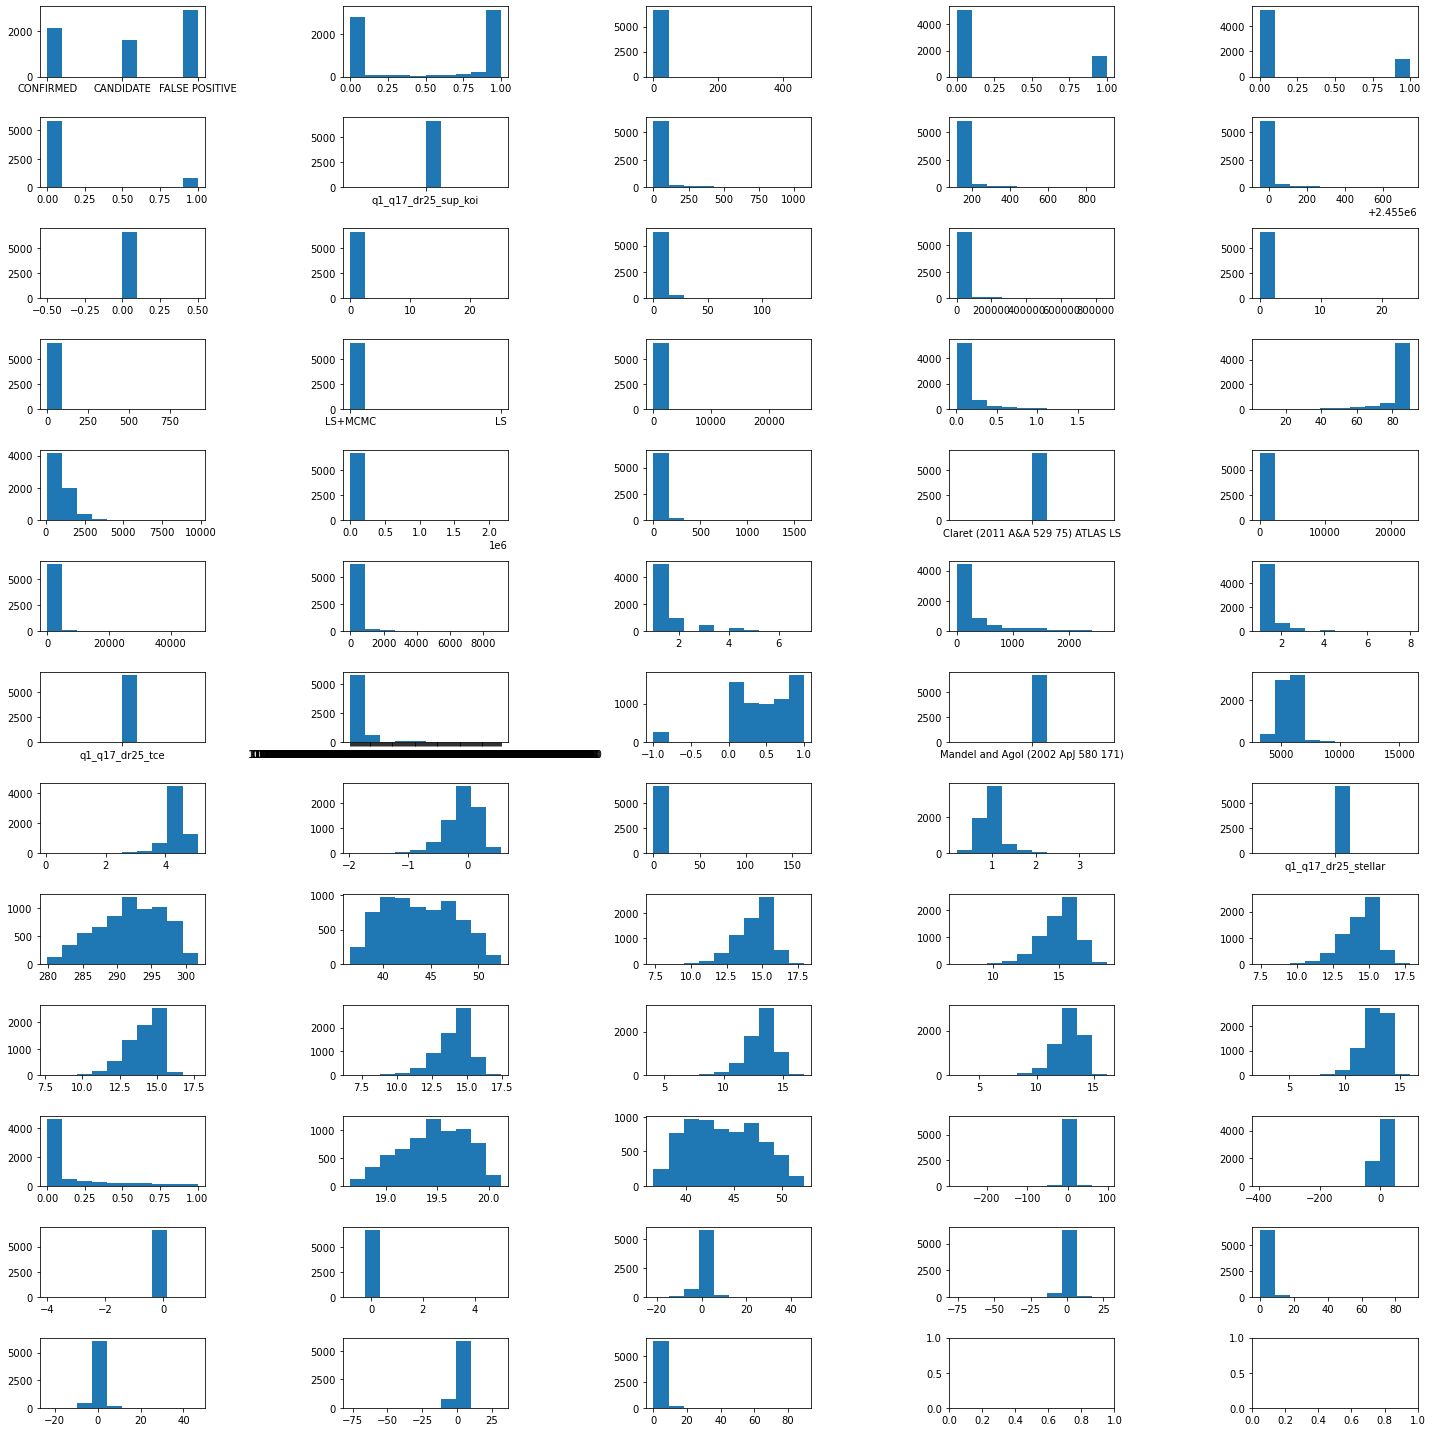

In [40]:
fig, axes = plt.subplots(figsize=(20,20),nrows=13,ncols=5)
for i in range(len(df_dna.columns)):
    row = i%5
    col = i//5
    axis = axes[col,row]
    axis.hist(df_dna[df_dna.columns[i]])
    plt.tight_layout()
    

In [43]:
for col in objects:
    print(df_dna[col].value_counts())

q1_q17_dr25_sup_koi    6682
Name: koi_disp_prov, dtype: int64
LS+MCMC    6613
LS           69
Name: koi_fittype, dtype: int64
Claret (2011 A&A 529 75) ATLAS LS    6682
Name: koi_limbdark_mod, dtype: int64
Mandel and Agol (2002 ApJ 580 171)    6682
Name: koi_trans_mod, dtype: int64
q1_q17_dr25_stellar    6682
Name: koi_sparprov, dtype: int64


In [45]:
df_dna = df_dna.drop(['koi_disp_prov','koi_limbdark_mod','koi_trans_mod','koi_sparprov'],axis=1)

In [46]:
df_dna.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6682 entries, 0 to 9563
Data columns (total 59 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   koi_disposition    6682 non-null   object 
 1   koi_score          6682 non-null   float64
 2   koi_fpflag_nt      6682 non-null   int64  
 3   koi_fpflag_ss      6682 non-null   int64  
 4   koi_fpflag_co      6682 non-null   int64  
 5   koi_fpflag_ec      6682 non-null   int64  
 6   koi_period         6682 non-null   float64
 7   koi_time0bk        6682 non-null   float64
 8   koi_time0          6682 non-null   float64
 9   koi_eccen          6682 non-null   float64
 10  koi_impact         6682 non-null   float64
 11  koi_duration       6682 non-null   float64
 12  koi_depth          6682 non-null   float64
 13  koi_ror            6682 non-null   float64
 14  koi_srho           6682 non-null   float64
 15  koi_fittype        6682 non-null   object 
 16  koi_prad           6682 

In [49]:
df_dna.koi_quarters.value_counts()

11111111111111111000000000000000    4381
00011111111111111000000000000000     428
11111011101110111000000000000000     349
11111101110111011000000000000000     338
01111111111111111000000000000000     208
                                    ... 
00000000000000111000000000000000       1
00000010000000000000000000000000       1
00110001101101111000000000000000       1
00000110011001100000000000000000       1
00000001101111000000000000000000       1
Name: koi_quarters, Length: 158, dtype: int64

In [51]:
df_dna.koi_tce_delivname.value_counts()

q1_q17_dr25_tce    6682
Name: koi_tce_delivname, dtype: int64

In [52]:
df_dna = df_dna.drop('koi_tce_delivname',axis=1)

In [53]:
df_dna.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6682 entries, 0 to 9563
Data columns (total 58 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   koi_disposition   6682 non-null   object 
 1   koi_score         6682 non-null   float64
 2   koi_fpflag_nt     6682 non-null   int64  
 3   koi_fpflag_ss     6682 non-null   int64  
 4   koi_fpflag_co     6682 non-null   int64  
 5   koi_fpflag_ec     6682 non-null   int64  
 6   koi_period        6682 non-null   float64
 7   koi_time0bk       6682 non-null   float64
 8   koi_time0         6682 non-null   float64
 9   koi_eccen         6682 non-null   float64
 10  koi_impact        6682 non-null   float64
 11  koi_duration      6682 non-null   float64
 12  koi_depth         6682 non-null   float64
 13  koi_ror           6682 non-null   float64
 14  koi_srho          6682 non-null   float64
 15  koi_fittype       6682 non-null   object 
 16  koi_prad          6682 non-null   float64


In [69]:
scaled_pipeline = Pipeline([                            #('ohe',OneHotEncoder()),
    ('ss', StandardScaler()),

                            ('log',LogisticRegression())])

In [70]:
scaled_pipeline

Pipeline(steps=[('ss', StandardScaler()), ('log', LogisticRegression())])

In [71]:
df_model = df_dna.copy()

In [72]:
#df_model['koi_fittype'] = df_model['koi_fittype'].replace(to_replace='LS+MCMC',value='LSMCMC')
df_model = df_model.drop('koi_fittype',axis=1)

In [73]:
X = df_model.drop('koi_disposition',axis=1)
y = df_model.koi_disposition
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=0)

********************************************************

     Classification Report: Train

                precision    recall  f1-score   support

     CANDIDATE       0.77      0.65      0.71      1272
     CONFIRMED       0.78      0.86      0.82      1728
FALSE POSITIVE       0.99      0.99      0.99      2345

      accuracy                           0.87      5345
     macro avg       0.85      0.84      0.84      5345
  weighted avg       0.87      0.87      0.87      5345

********************************************************

     Classification Report: Test

                precision    recall  f1-score   support

     CANDIDATE       0.78      0.63      0.70       317
     CONFIRMED       0.77      0.88      0.82       427
FALSE POSITIVE       0.98      0.99      0.99       593

      accuracy                           0.87      1337
     macro avg       0.85      0.83      0.84      1337
  weighted avg       0.87      0.87      0.87      1337

*************************

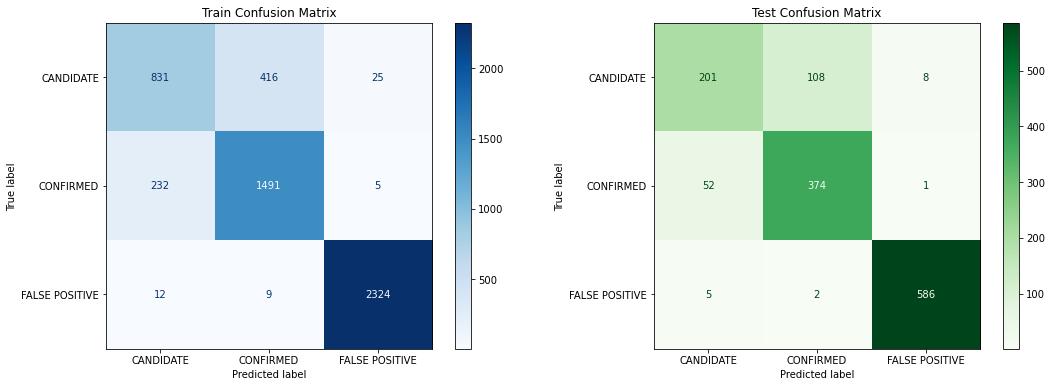

In [75]:
modeled = run_class_model(scaled_pipeline, X_train, y_train, X_test, y_test)

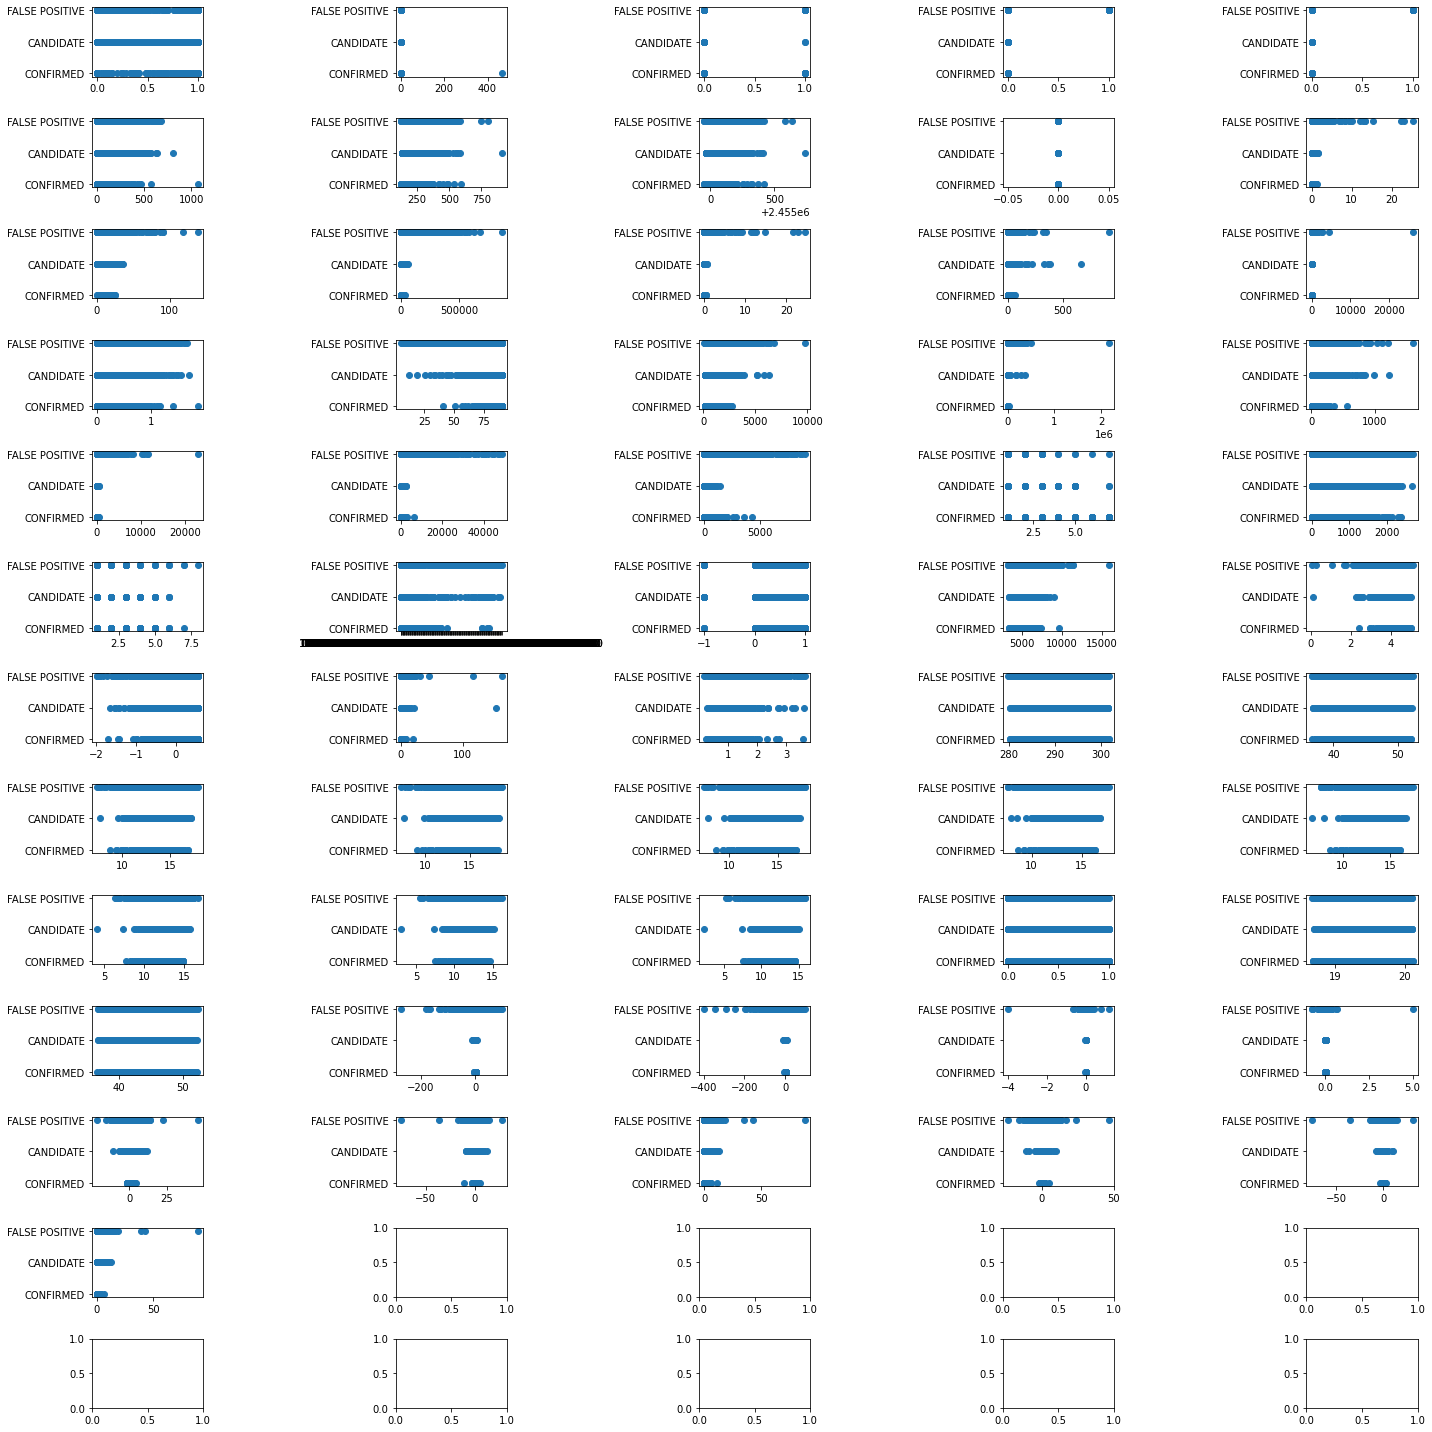

In [87]:
fig, axes = plt.subplots(figsize=(20,20),nrows=13,ncols=5)
for i in range(len(X.columns)):
    row = i%5
    col = i//5
    axis = axes[col,row]
    axis.scatter(X[X.columns[i]],y)
    plt.tight_layout()